<a href="https://colab.research.google.com/github/Pathway2008/Loan_rating/blob/main/Loan_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/loan_rating/train.csv')
test = pd.read_csv('/content/drive/MyDrive/loan_rating/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/loan_rating/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [ ]:
# 소득*부채/소득비율 = 부채, 총상환원금 / 부채 = 상환비

In [3]:
train['부채'] = train['연간소득'] * train['부채_대비_소득_비율']
test['부채'] = test['연간소득'] * test['부채_대비_소득_비율']

In [ ]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [ ]:
train['대출기간'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
train['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year',
       '10+years', '<1 year', '3', '1 years'], dtype=object)

In [ ]:
train[train['근로기간']=='Unknown']

In [ ]:
train['대출등급'].unique()

array(['C', 'B', 'A', 'D', 'F', 'G', 'E'], dtype=object)

In [ ]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [ ]:
import warnings
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
warnings.filterwarnings('ignore')
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


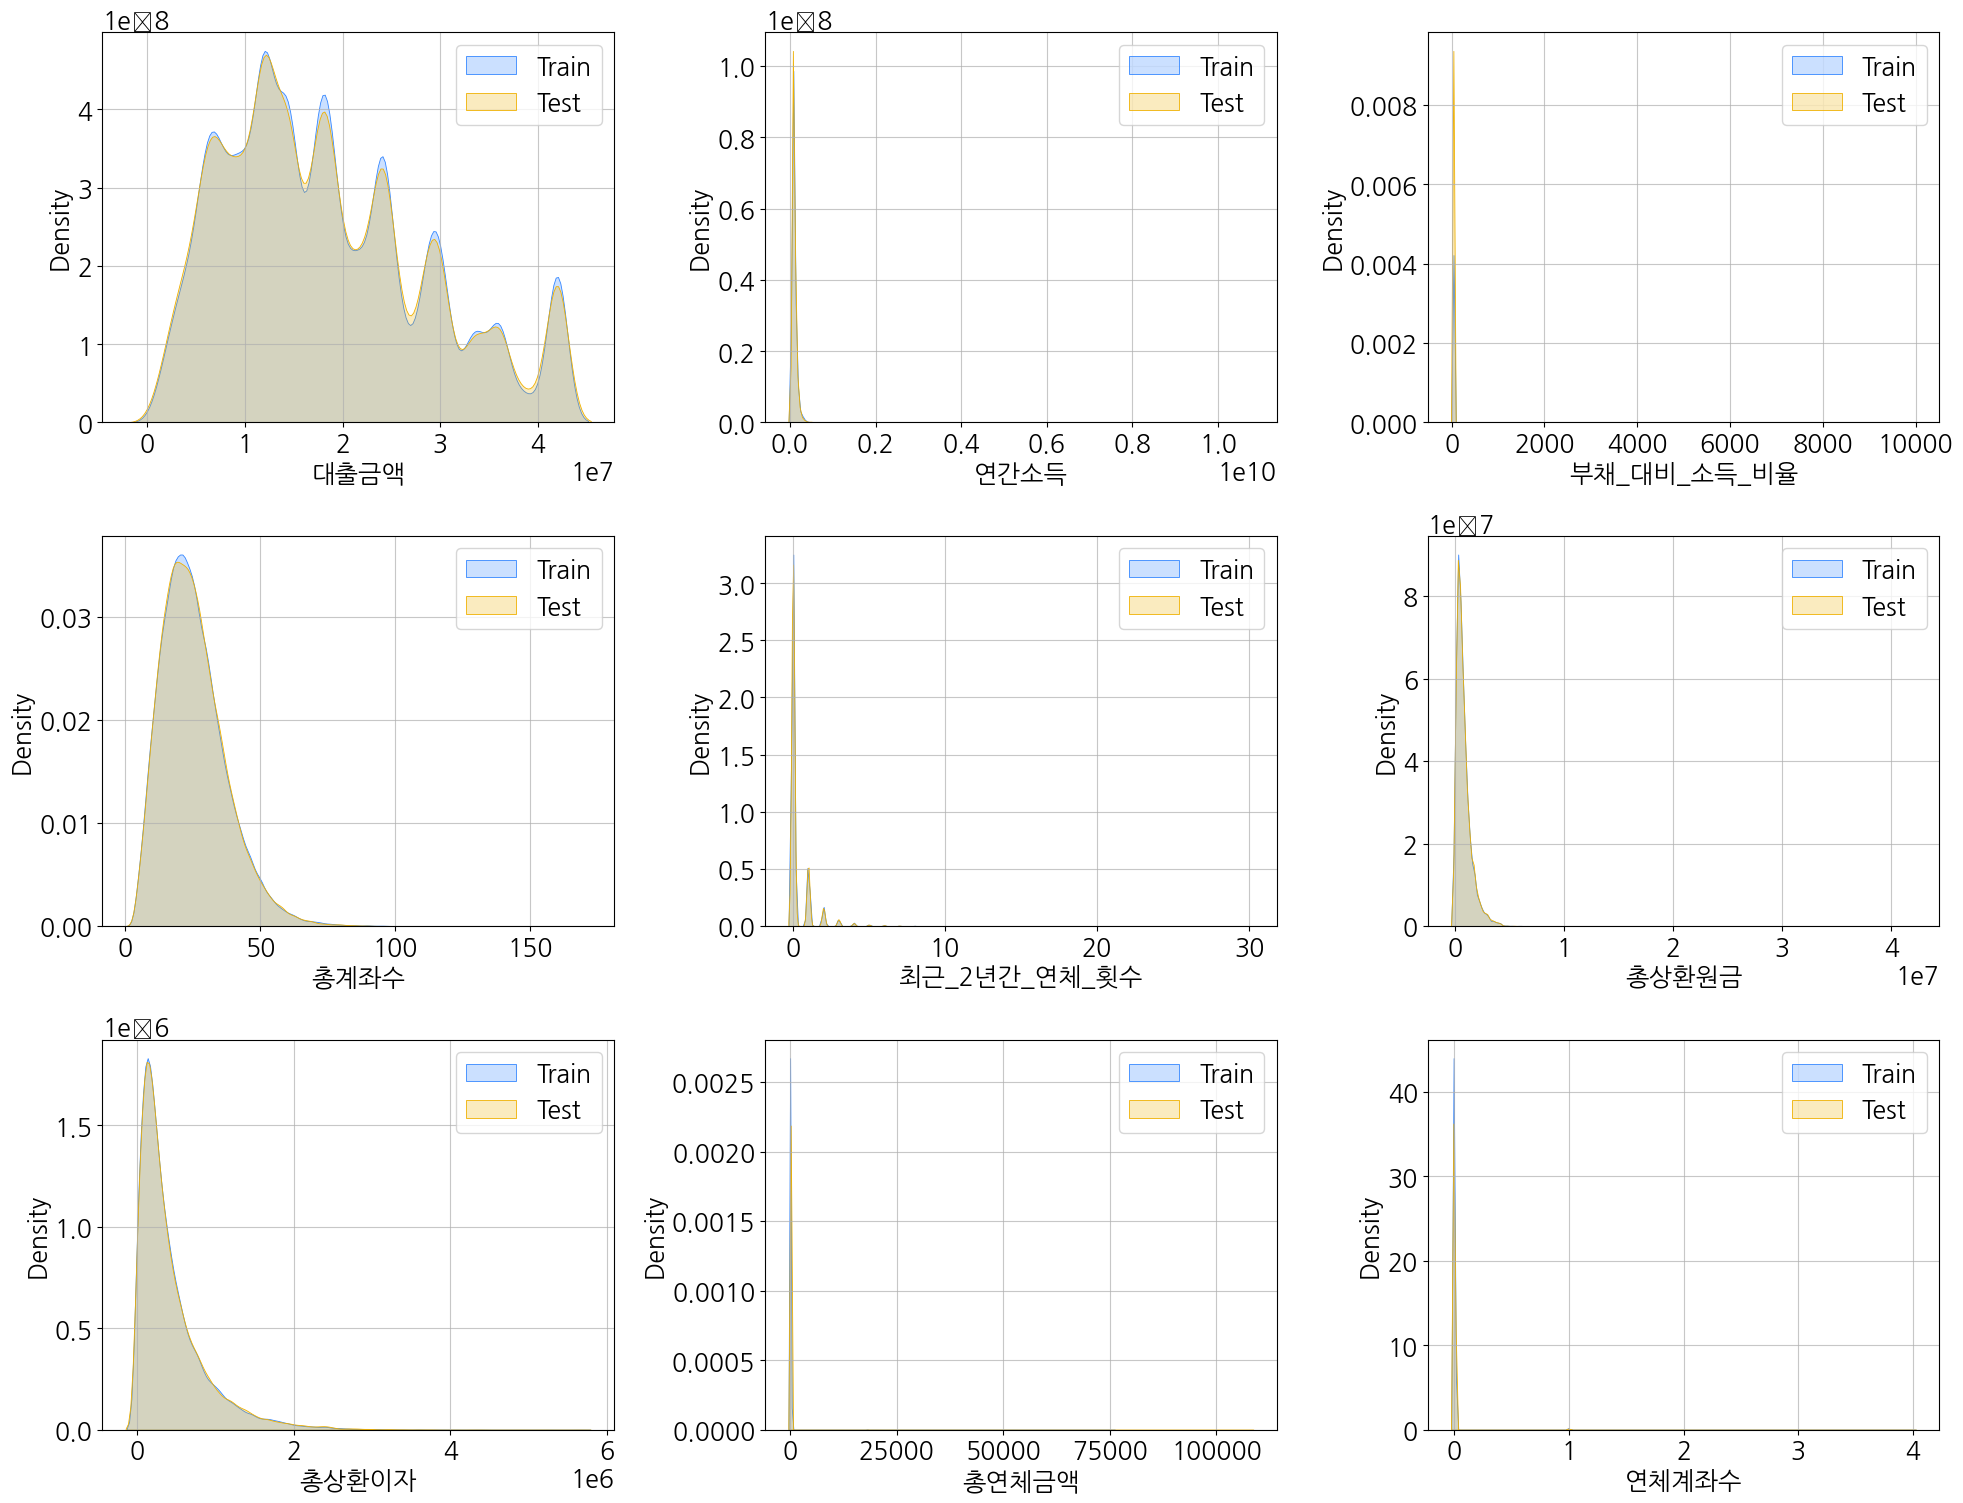

In [ ]:
numeric_columns = train.drop(columns=['ID']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = train, label = "Train")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = test, label = "Test")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

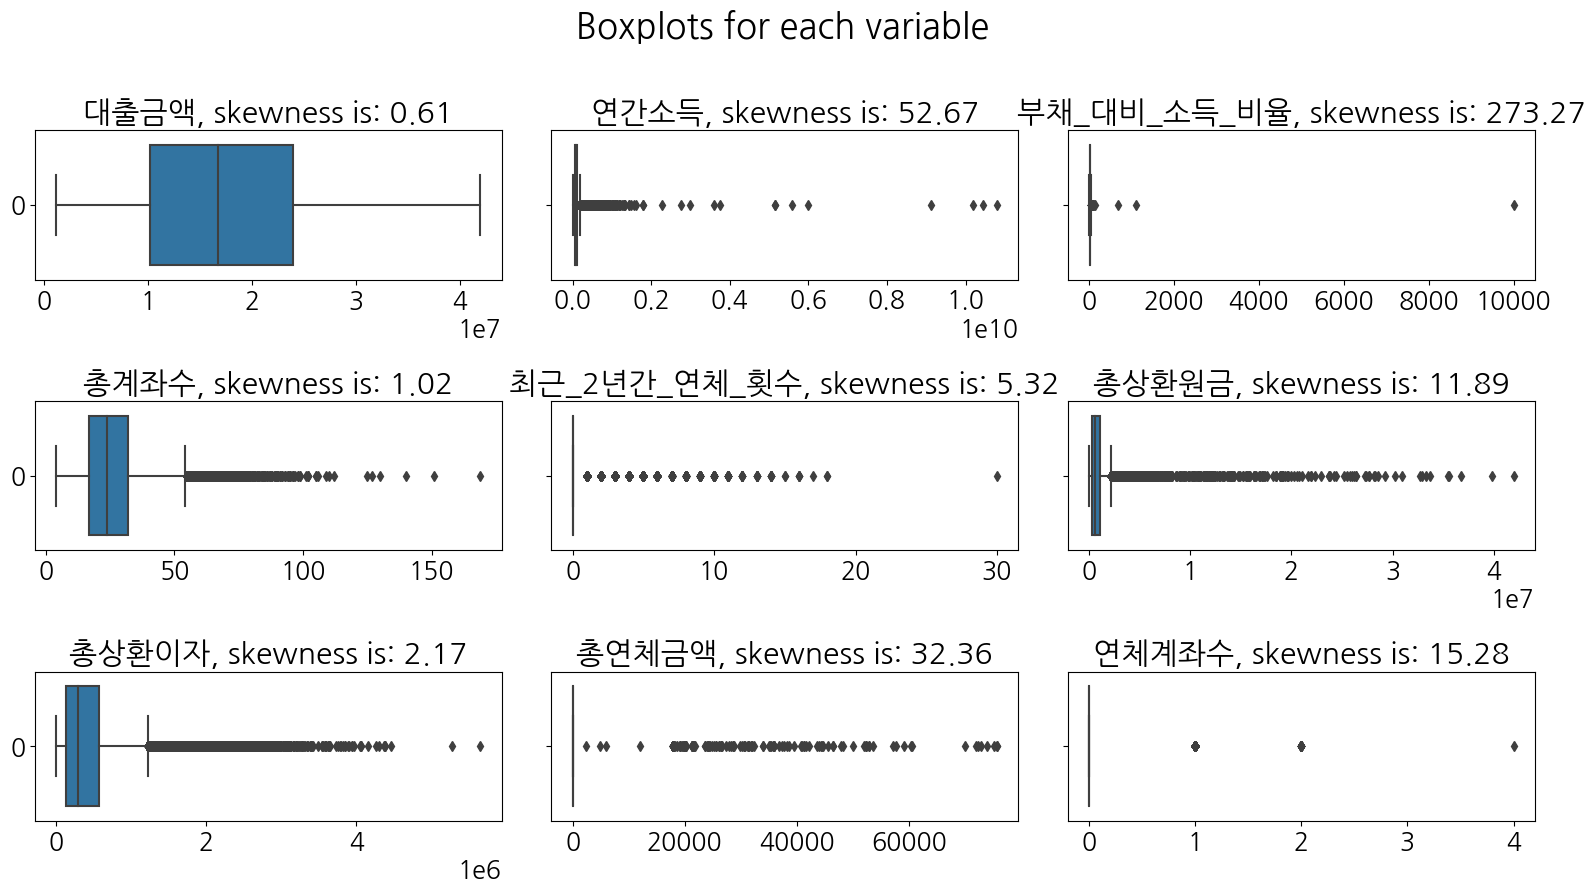

In [ ]:
numeric_columns = train.drop(columns=['ID']).select_dtypes(include='number')

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3 * rows))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=train, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [41]:
from collections import Counter
def detect_outliers(df,n,features):
    outlier_indices = []

    # iterating over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # appending the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # selecting observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

In [42]:
# detecting outliers
numeric_columns = train.drop(columns=['ID','대출등급']).select_dtypes(include='number')
ior = detect_outliers(train,0,numeric_columns)#,

In [43]:
len(ior)

32414

In [44]:
df_out = train.drop(ior, axis = 0).reset_index(drop=True)
out_n0 = train.loc[train.index[ior]]
df_out['대출등급'].value_counts()

대출등급
B    19884
C    18668
A    11557
D     8468
E     4217
F      918
G      168
Name: count, dtype: int64

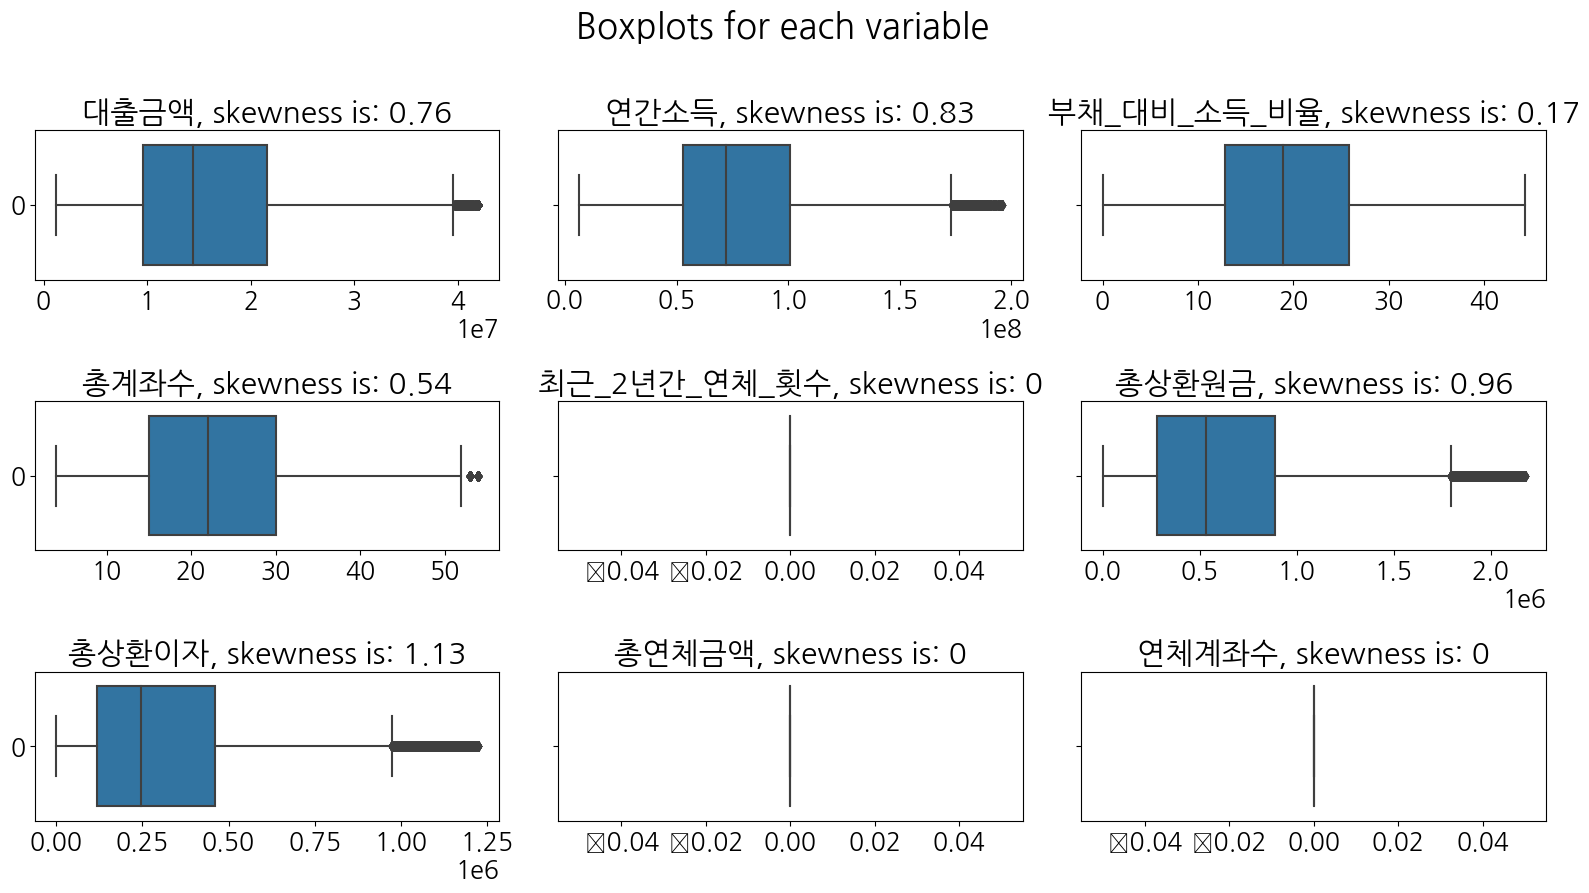

In [ ]:
numeric_columns = df_out.drop(columns=['ID']).select_dtypes(include='number')

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3 * rows))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df_out, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [ ]:
out_n0['대출등급'].value_counts()

C    8621
B    8605
A    5030
D    4749
E    3090
F    1023
G     251
Name: 대출등급, dtype: int64

In [ ]:
df_out2 = train.drop(ior, axis = 0).reset_index(drop=True)
out_n1 = train.loc[train.index[ior]]
df_out2['대출등급'].value_counts()

B    27548
C    26051
A    15956
D    12290
E     6641
F     1708
G      362
Name: 대출등급, dtype: int64

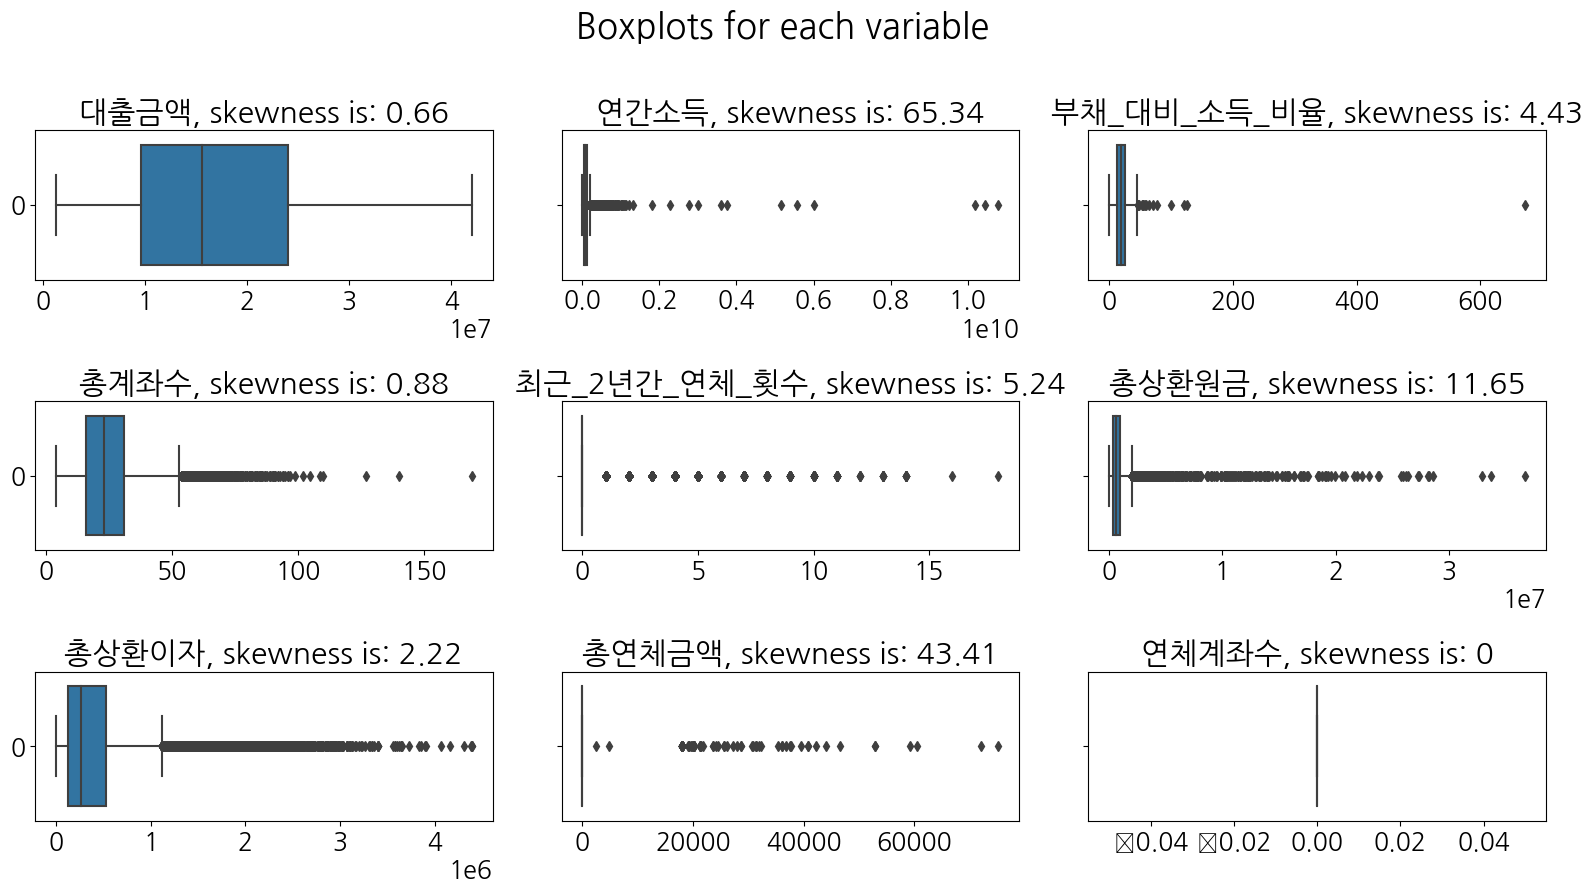

In [ ]:
numeric_columns = df_out2.drop(columns=['ID']).select_dtypes(include='number')

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3 * rows))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df_out2, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [ ]:
out_n1['대출등급'].value_counts()

C    1572
B    1269
D    1064
A     816
E     713
F     246
G      58
Name: 대출등급, dtype: int64

In [ ]:
train['대출등급'].value_counts()

B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: 대출등급, dtype: int64

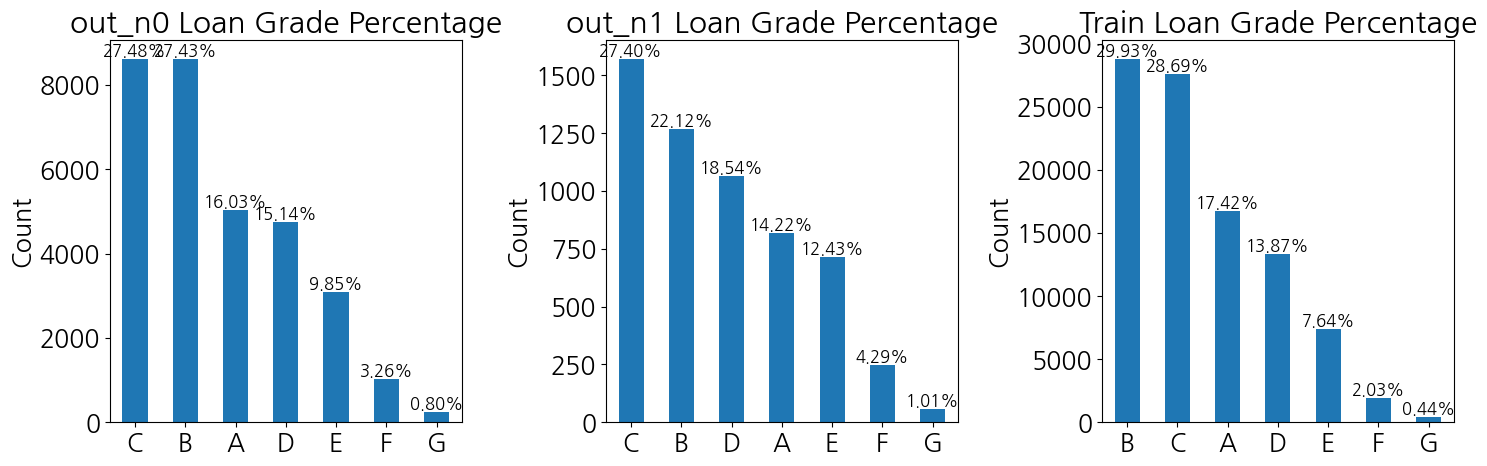

In [ ]:
import matplotlib.pyplot as plt

def plot_loan_grade_percentage(df, title, ax):
    value_counts = df['대출등급'].value_counts()
    value_counts.plot(kind='bar', ax=ax, title=title)

    total = len(df)
    for i, value in enumerate(value_counts):
        ax.text(i, value, f'{(value/total)*100:.2f}%', ha='center', va='bottom', fontsize=12)

    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='horizontal')
    ax.set_ylabel('Count')

# List of DataFrames and corresponding titles
dfs = [out_n0, out_n1, train]
titles = ['out_n0 Loan Grade Percentage', 'out_n1 Loan Grade Percentage', 'Train Loan Grade Percentage']

# Create a single row with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through DataFrames, titles, and subplots for plotting
for df, title, ax in zip(dfs, titles, axes):
    plot_loan_grade_percentage(df, title, ax)

plt.tight_layout()
plt.show()

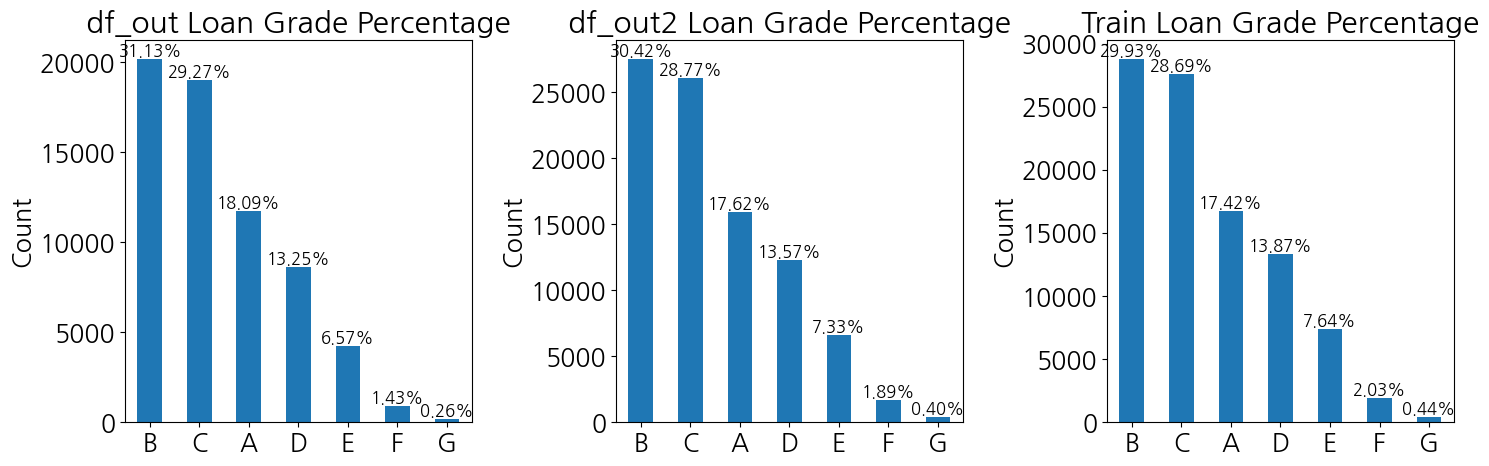

In [ ]:
import matplotlib.pyplot as plt

def plot_loan_grade_percentage(df, title, ax):
    value_counts = df['대출등급'].value_counts()
    value_counts.plot(kind='bar', ax=ax, title=title)

    total = len(df)
    for i, value in enumerate(value_counts):
        ax.text(i, value, f'{(value/total)*100:.2f}%', ha='center', va='bottom', fontsize=12)

    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='horizontal')
    ax.set_ylabel('Count')

# List of DataFrames and corresponding titles
dfs = [df_out, df_out2, train]
titles = ['df_out Loan Grade Percentage', 'df_out2 Loan Grade Percentage', 'Train Loan Grade Percentage']

# Create a single row with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through DataFrames, titles, and subplots for plotting
for df, title, ax in zip(dfs, titles, axes):
    plot_loan_grade_percentage(df, title, ax)

plt.tight_layout()
plt.show()

In [ ]:
numeric_columns.head()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,12480000,72000000,18.90,15,0,0,0.0,0.0,0.0
1,14400000,130800000,22.33,21,0,373572,234060.0,0.0,0.0
2,12000000,96000000,8.60,14,0,928644,151944.0,0.0,0.0
3,14400000,132000000,15.09,15,0,325824,153108.0,0.0,0.0
4,18000000,71736000,25.39,19,0,228540,148956.0,0.0,0.0


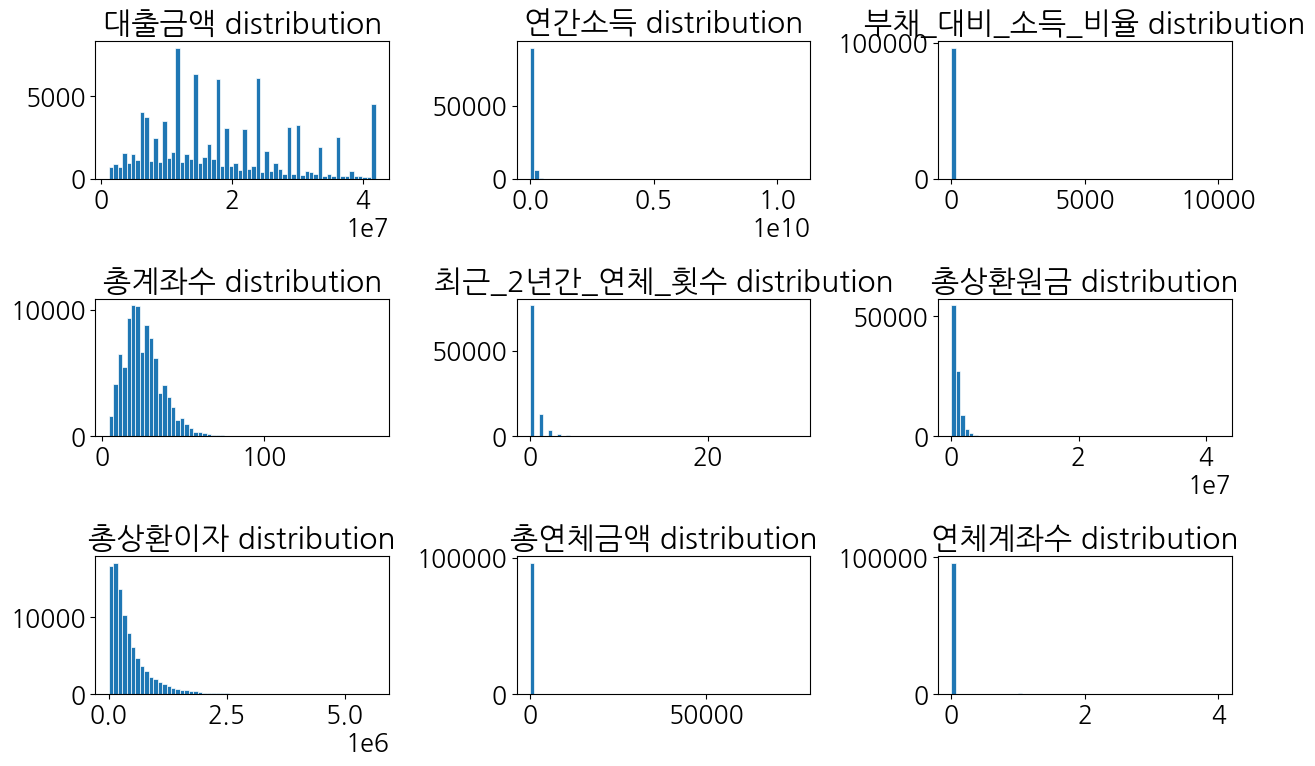

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(train['대출금액'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("대출금액 distribution");

axes[0,1].hist(train['연간소득'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("연간소득 distribution");

axes[0,2].hist(train['부채_대비_소득_비율'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("부채_대비_소득_비율 distribution");

axes[1,0].hist(train['총계좌수'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("총계좌수 distribution");

axes[1,1].hist(train['최근_2년간_연체_횟수'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("최근_2년간_연체_횟수 distribution");

axes[1,2].hist(train['총상환원금'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("총상환원금 distribution");

axes[2,0].hist(train['총상환이자'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("총상환이자 distribution");

axes[2,1].hist(train['총연체금액'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("총연체금액 distribution");

axes[2,2].hist(train['연체계좌수'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("연체계좌수 distribution");

plt.tight_layout()

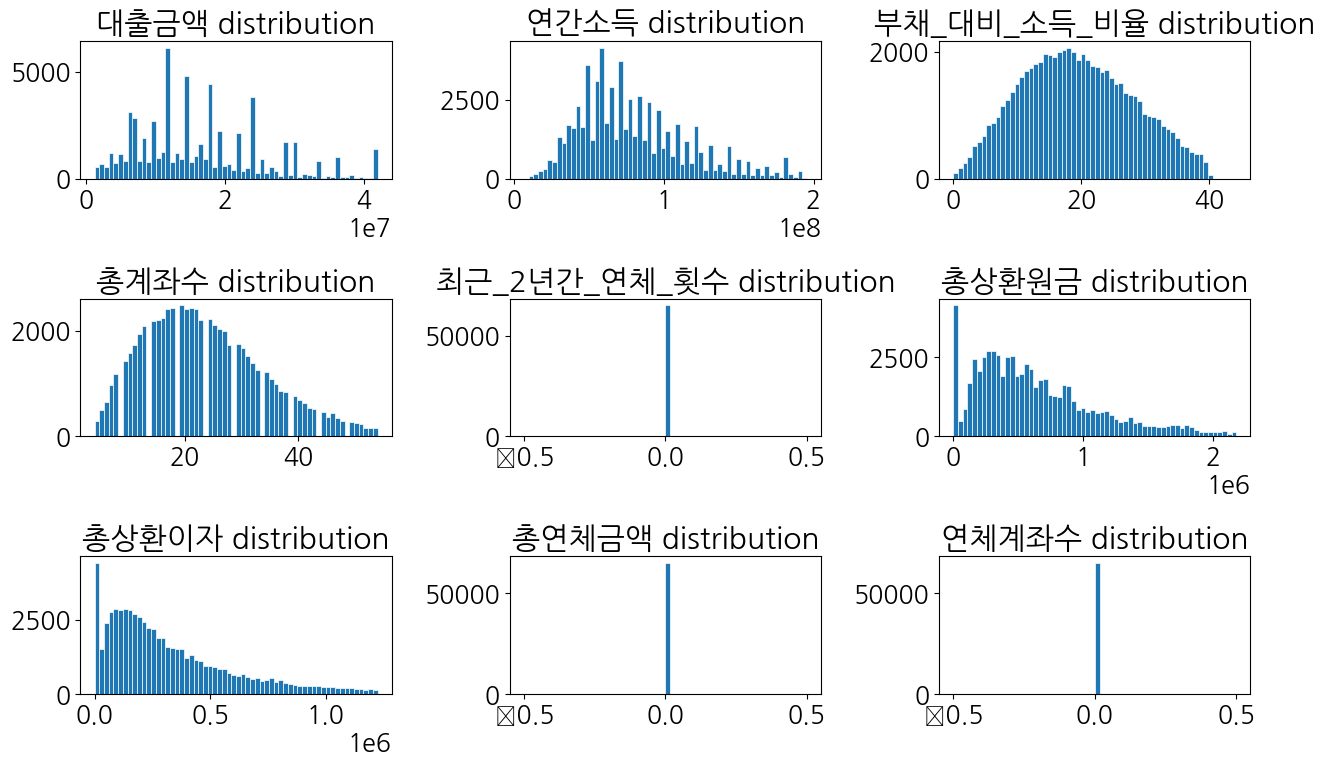

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df_out['대출금액'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("대출금액 distribution");

axes[0,1].hist(df_out['연간소득'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("연간소득 distribution");

axes[0,2].hist(df_out['부채_대비_소득_비율'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("부채_대비_소득_비율 distribution");

axes[1,0].hist(df_out['총계좌수'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("총계좌수 distribution");

axes[1,1].hist(df_out['최근_2년간_연체_횟수'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("최근_2년간_연체_횟수 distribution");

axes[1,2].hist(df_out['총상환원금'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("총상환원금 distribution");

axes[2,0].hist(df_out['총상환이자'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("총상환이자 distribution");

axes[2,1].hist(df_out['총연체금액'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("총연체금액 distribution");

axes[2,2].hist(df_out['연체계좌수'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("연체계좌수 distribution");

plt.tight_layout()

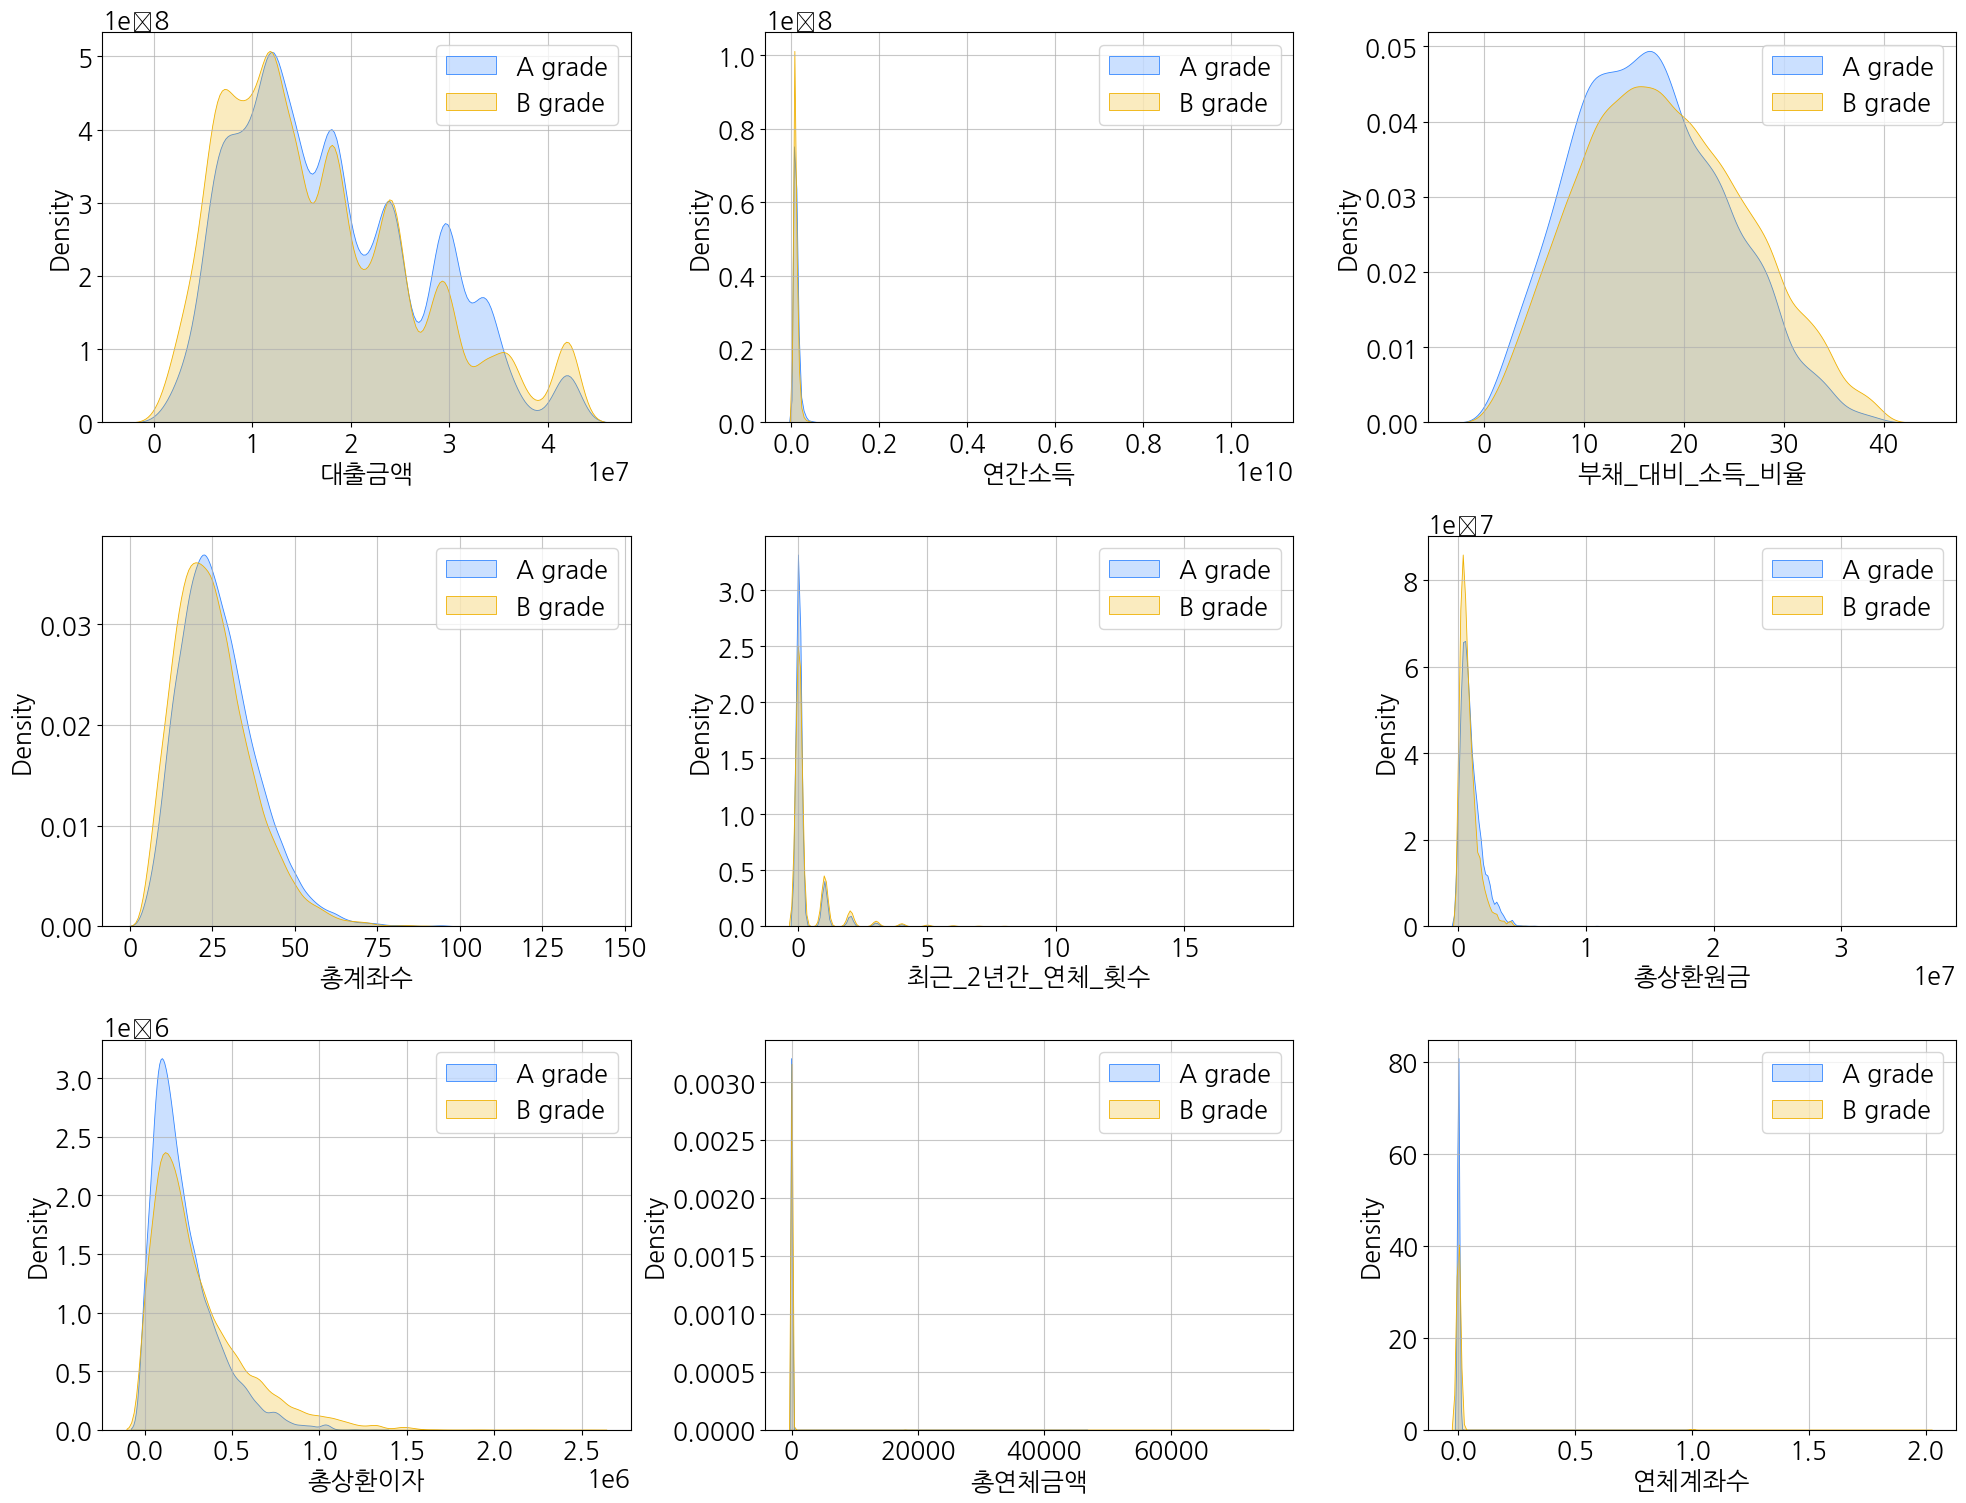

In [ ]:
a = train[train['대출등급']=='A'].reset_index(drop=True)
b = train[train['대출등급']=='B'].reset_index(drop=True)

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = a, label = "A grade")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = b, label = "B grade")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

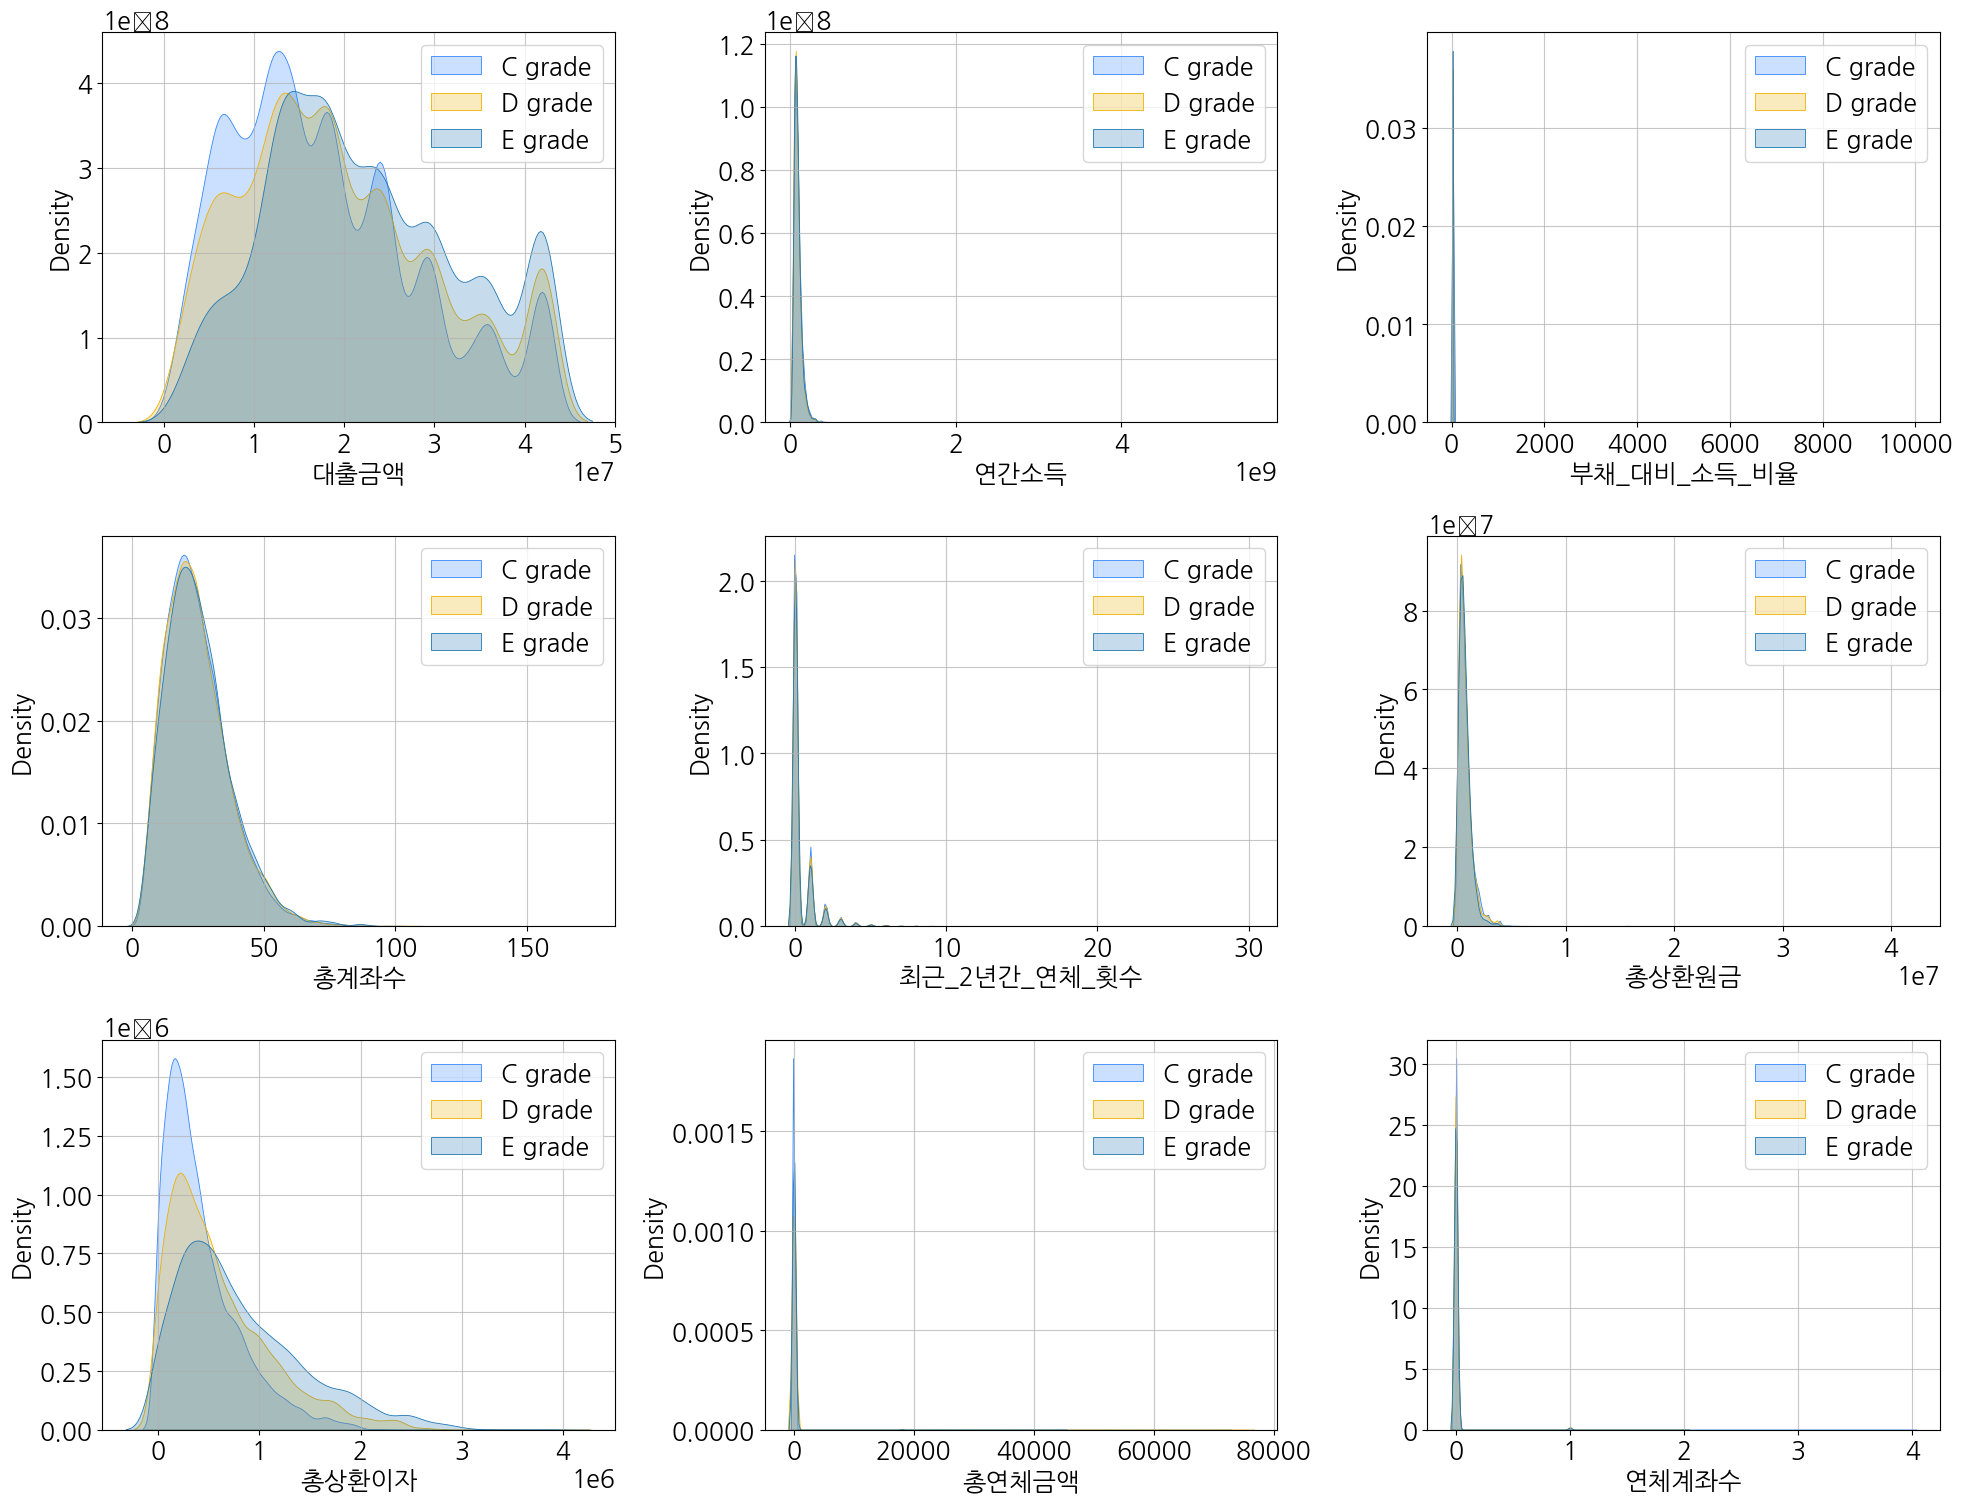

In [ ]:
c = train[train['대출등급']=='C'].reset_index(drop=True)
d = train[train['대출등급']=='D'].reset_index(drop=True)
e = train[train['대출등급']=='E'].reset_index(drop=True)

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = c, label = "C grade")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = d, label = "D grade")
    sns.kdeplot(x = num, fill = True,linewidth=0.6, data = e, label = "E grade")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

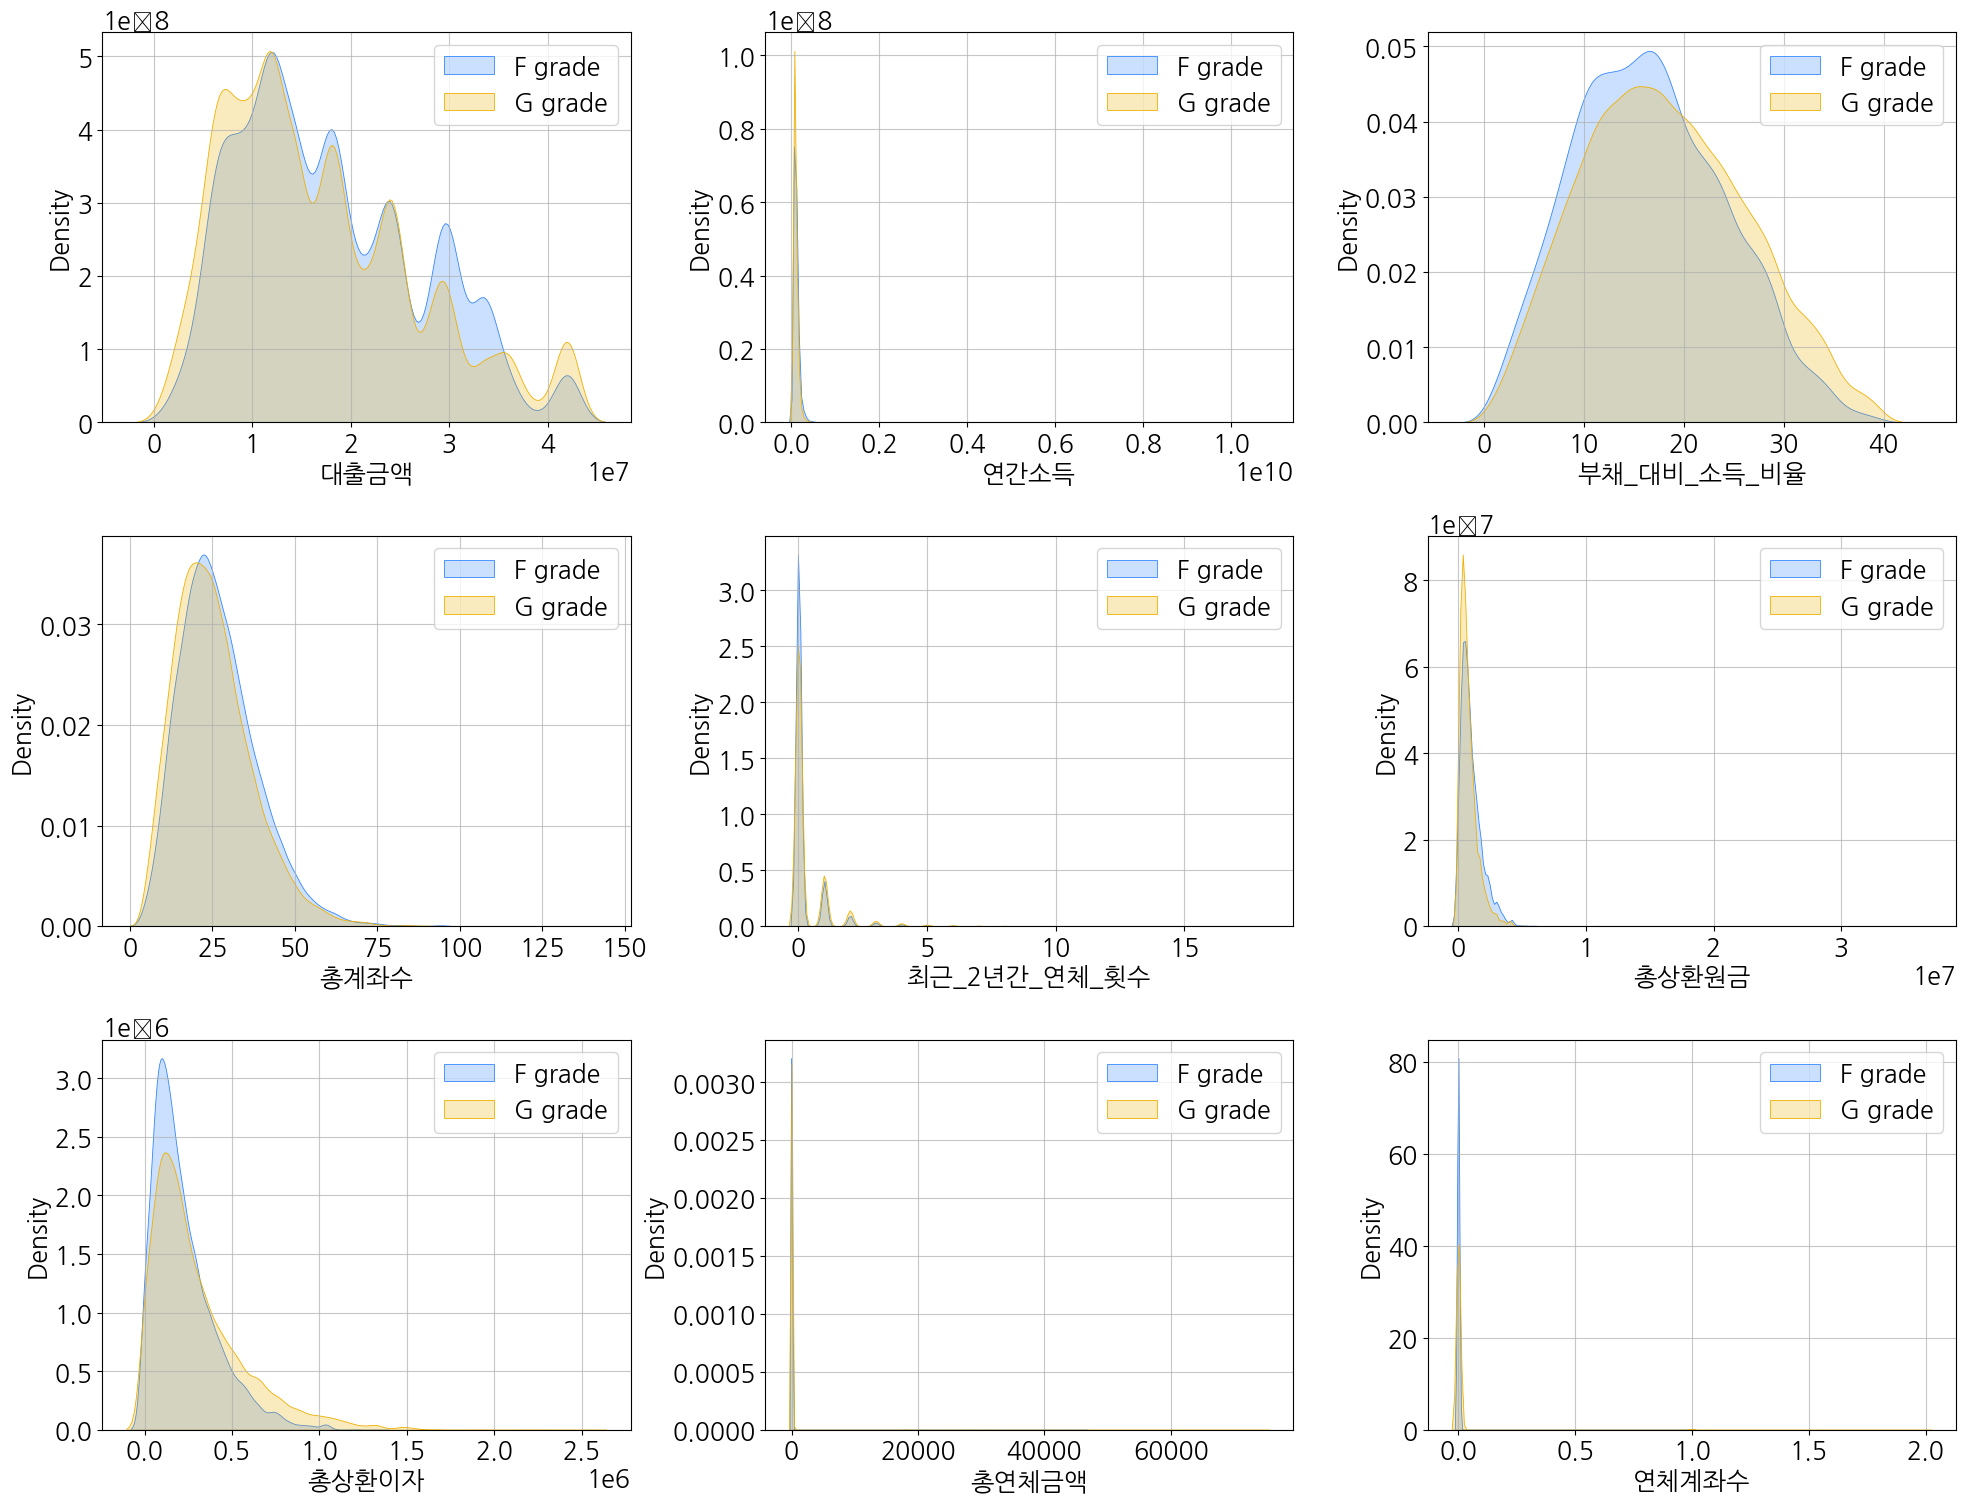

In [ ]:
f = train[train['대출등급']=='F'].reset_index(drop=True)
g = train[train['대출등급']=='G'].reset_index(drop=True)

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = a, label = "F grade")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = b, label = "G grade")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

In [ ]:
#drop_out

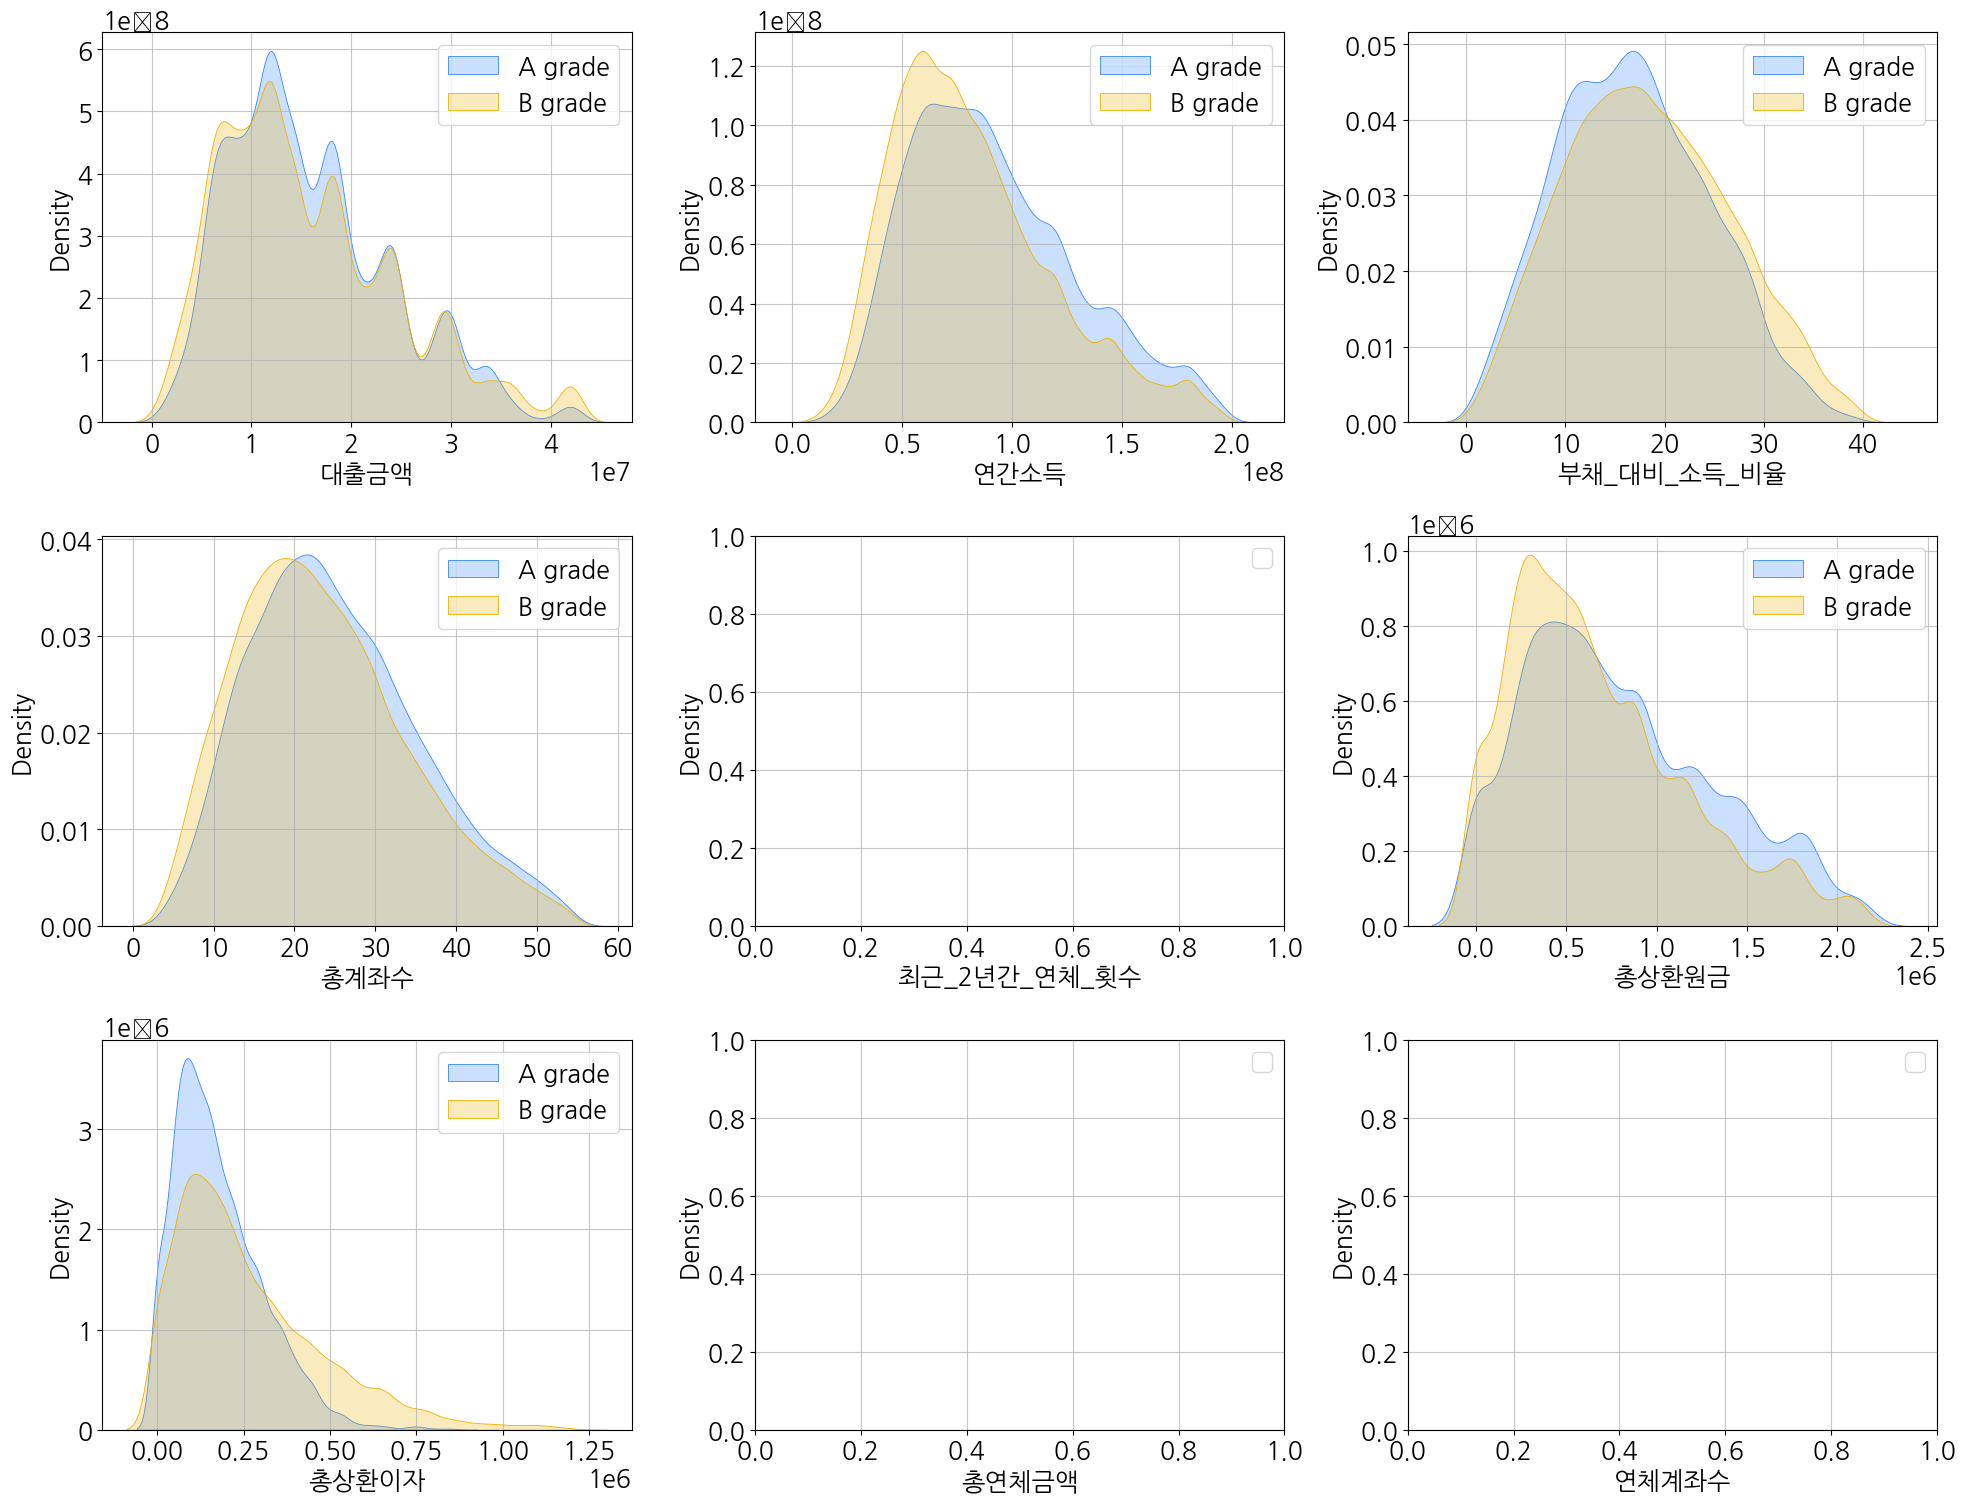

In [ ]:
a = df_out[df_out['대출등급']=='A'].reset_index(drop=True)
b = df_out[df_out['대출등급']=='B'].reset_index(drop=True)

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = a, label = "A grade")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = b, label = "B grade")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

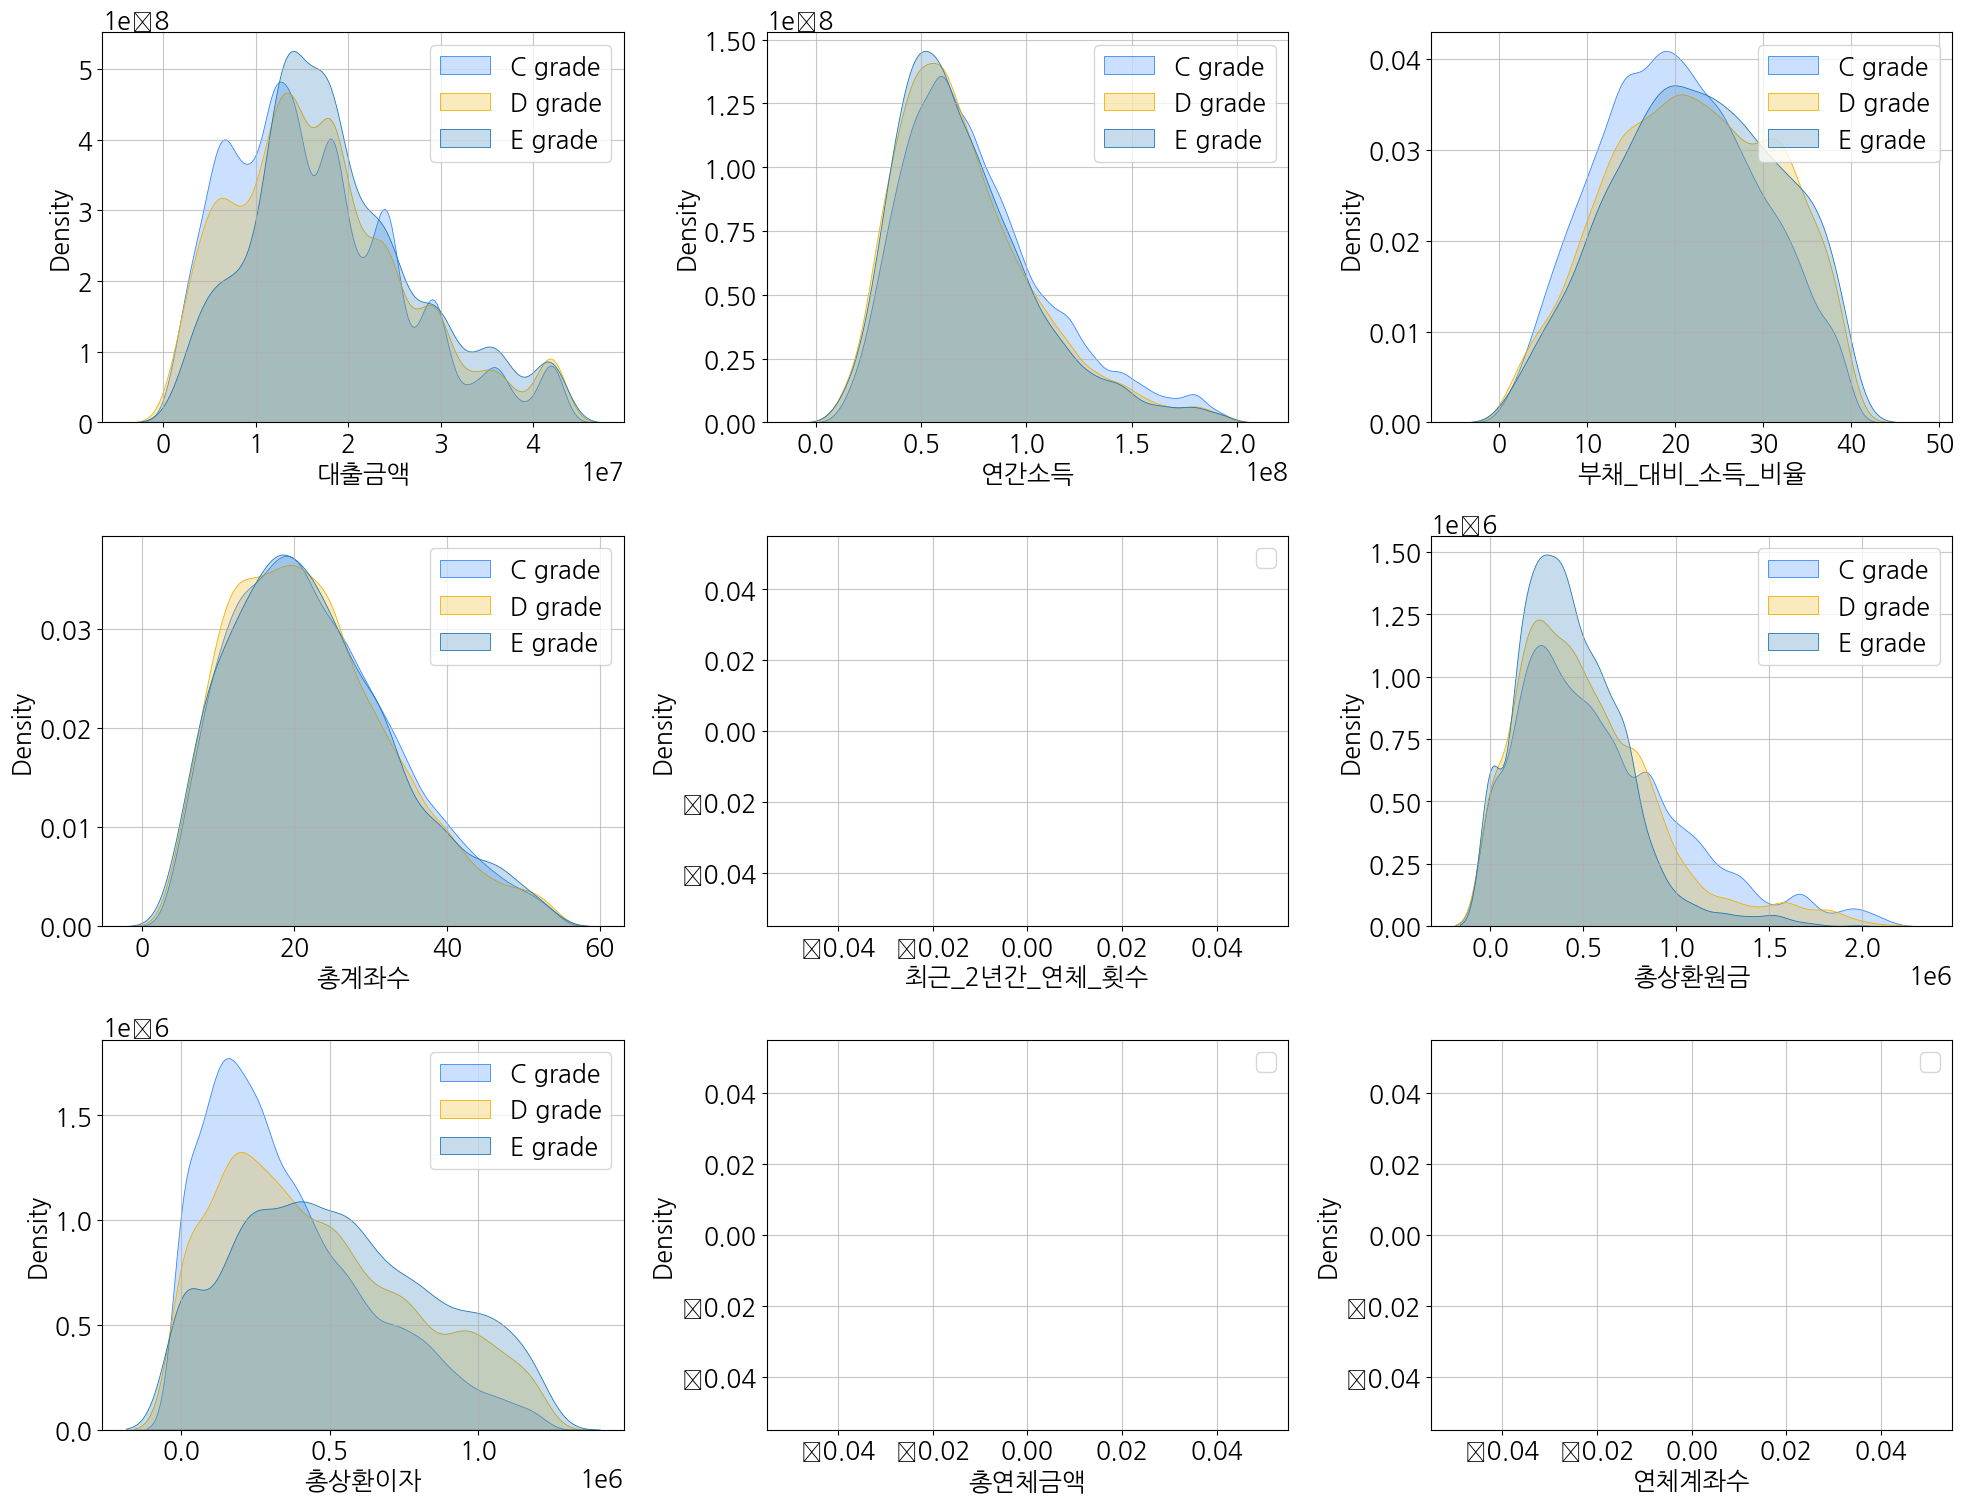

In [ ]:
c = df_out[df_out['대출등급']=='C'].reset_index(drop=True)
d = df_out[df_out['대출등급']=='D'].reset_index(drop=True)
e = df_out[df_out['대출등급']=='E'].reset_index(drop=True)

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = c, label = "C grade")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = d, label = "D grade")
    sns.kdeplot(x = num, fill = True,linewidth=0.6, data = e, label = "E grade")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

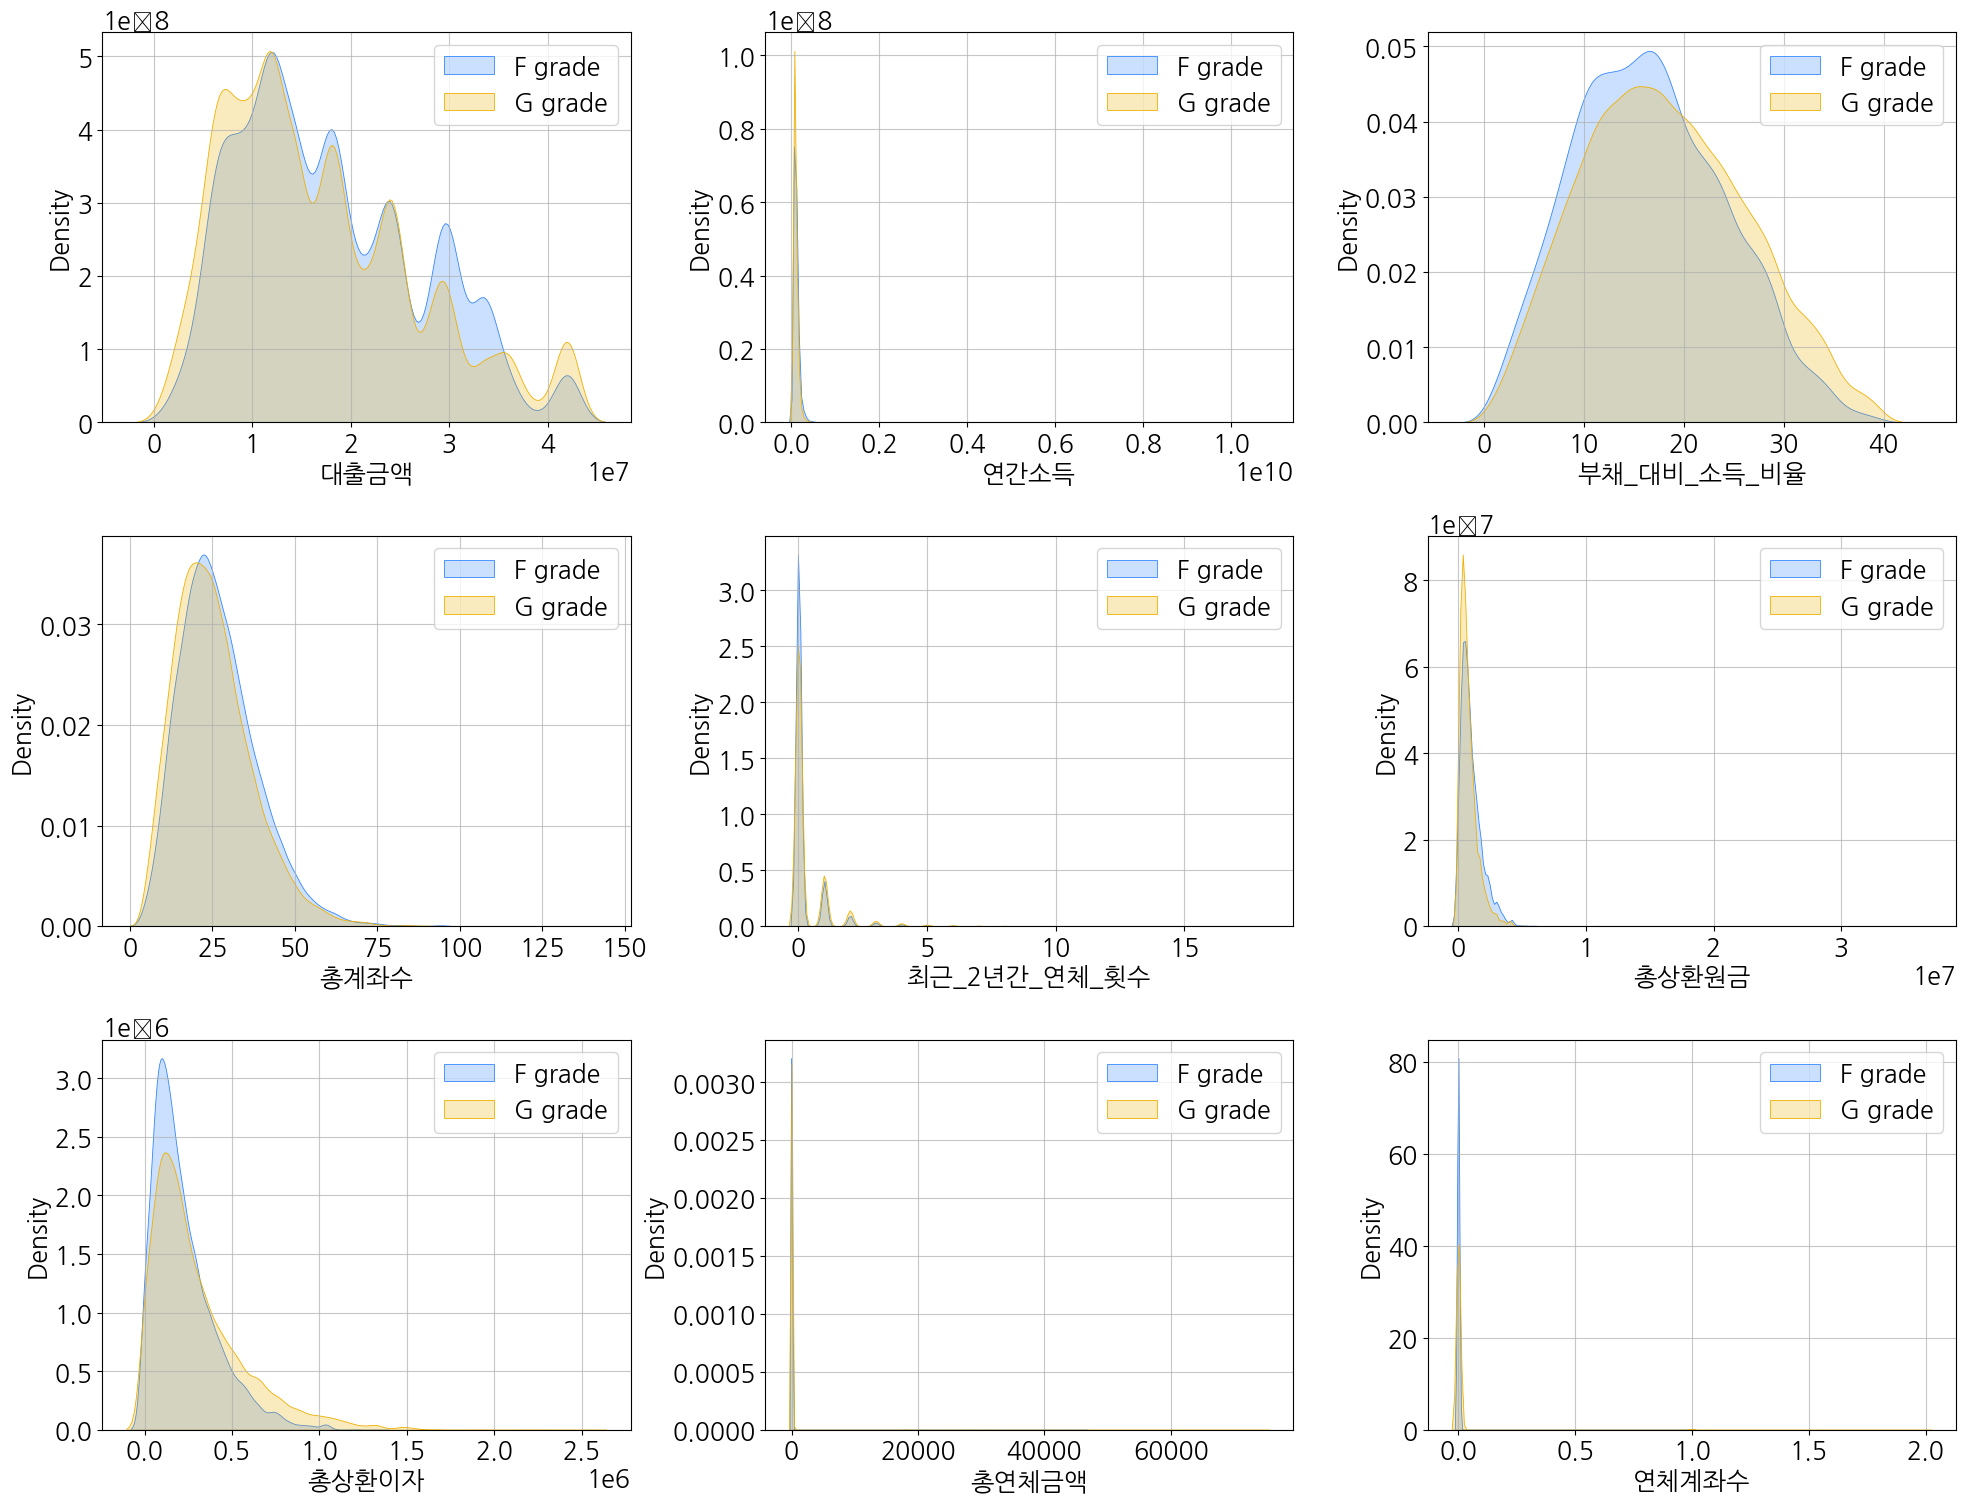

In [ ]:
f = df_out[df_out['대출등급']=='F'].reset_index(drop=True)
g = df_out[df_out['대출등급']=='G'].reset_index(drop=True)

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = a, label = "F grade")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = b, label = "G grade")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

# Labeling

In [ ]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
train['대출기간'].value_counts()

 36 months    64479
 60 months    31815
Name: 대출기간, dtype: int64

In [ ]:
train['근로기간'].value_counts()

10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: 근로기간, dtype: int64

In [ ]:
train['주택소유상태'].value_counts() # any = drop

MORTGAGE    47934
RENT        37705
OWN         10654
Name: 주택소유상태, dtype: int64

In [4]:
train = train[train['주택소유상태'] != 'ANY']

In [ ]:
train['대출목적'].value_counts()

부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: 대출목적, dtype: int64

In [5]:
train['근로기간'] = train['근로기간'].replace('< 1 year', '<1 year')
train['근로기간'] = train['근로기간'].replace('1 year', '1 years')
train['근로기간'] = train['근로기간'].replace('3', '3 years')
train['근로기간'] = train['근로기간'].replace('10+years', '10+ years')

<ipython-input-5-69f9dbd2698e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['근로기간'] = train['근로기간'].replace('< 1 year', '<1 year')
<ipython-input-5-69f9dbd2698e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['근로기간'] = train['근로기간'].replace('1 year', '1 years')
<ipython-input-5-69f9dbd2698e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [19]:
train['근로기간'].value_counts()

10+ years    32480
2 years       8450
<1 year       8144
3 years       7670
1 years       6305
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
Name: 근로기간, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
ordinal_features = ['대출기간', '근로기간', '주택소유상태','대출목적']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [7]:
train['대출등급'] = le.fit_transform(train['대출등급'])

In [8]:
le.inverse_transform(train['대출등급'])

array(['C', 'B', 'A', ..., 'A', 'D', 'C'], dtype=object)

In [46]:
#df_out
df_out = df_out[df_out['주택소유상태'] != 'ANY']

In [47]:
df_out['근로기간'] = df_out['근로기간'].replace('< 1 year', '<1 year')
df_out['근로기간'] = df_out['근로기간'].replace('1 year', '1 years')
df_out['근로기간'] = df_out['근로기간'].replace('3', '3 years')
df_out['근로기간'] = df_out['근로기간'].replace('10+years', '10+ years')

In [48]:
df_out['근로기간'].value_counts()

근로기간
10+ years    20245
2 years       5658
<1 year       5594
3 years       5279
Unknown       4331
1 years       4255
4 years       3820
5 years       3798
8 years       3261
6 years       2607
7 years       2551
9 years       2480
Name: count, dtype: int64

In [49]:
df_out['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    29254
RENT        27459
OWN          7166
Name: count, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder
ordinal_features = ['대출기간', '근로기간', '주택소유상태','대출목적']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(df_out[feature])
    df_out[feature] = le.transform(df_out[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

In [51]:
df_out['대출등급'] = le.fit_transform(df_out['대출등급'])

#XGB

In [9]:
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

In [12]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [73]:
from sklearn.model_selection import train_test_split
X = train.drop('대출등급', axis=1)
y = train['대출등급']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [34]:
from sklearn.model_selection import KFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [35]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_train,y_train)

score = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='f1_macro')

In [37]:
score, score.mean()

(array([0.7842    , 0.77425259, 0.7587228 , 0.78011786, 0.78259133]),
 0.7759769165395769)

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_rf = GridSearchCV(xgb_model, param_grid=param_grid,
                          scoring='f1_macro').fit(X_train, y_train)

In [82]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best score: 0.7831101656151793


#SMOTE

In [62]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline

In [74]:
#new
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_tr, y_tr = resample.fit_resample(X_train, y_train)

In [75]:
y_train.value_counts()

1    20172
2    19335
0    11740
3     9348
4     5148
5     1368
6      294
Name: 대출등급, dtype: int64

In [76]:
y_tr.value_counts()

5    20172
1    20172
4    20172
3    20172
2    20172
6    20172
0    16491
Name: 대출등급, dtype: int64

In [79]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
xgb_model.fit(X_tr,y_tr)

score = cross_val_score(xgb_model, X_tr, y_tr, cv=kf, scoring='f1_macro')

In [80]:
score,score.mean()

(array([0.85583474, 0.86492664, 0.87182466, 0.87422441, 0.86916076]),
 0.8671942408074385)

In [81]:
y_pred = xgb_model.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_macro

0.7729510096144975

In [55]:
pred = xgb_model.predict(test)

In [59]:
sub['대출등급'] = pred

In [60]:
sub['대출등급'] = sub['대출등급'].map({0: 'A', 1: 'B', 2: 'C',3: 'D',4: 'E',5: 'F',6: 'G'})
sub.head()

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C


In [61]:
sub.to_csv('smote_xgb.csv',index=False)

#auto to be delete

In [1]:
!pip install autogluon

In [10]:
from autogluon.tabular import TabularDataset, TabularPredictor
train = TabularDataset(train)
test = TabularDataset(test)

In [20]:
fit_parameters = {
    'presets': 'best_quality',
    'num_bag_folds': 7,
    'num_bag_sets': 5,
    'num_stack_levels': 1

} #auto_stack = True, fit_weighted_ensemble = True,

In [26]:
hyperparameters = {
    'XGB': {'model': 'XGB', 'priority': 0},       # XGBoost
    #'NN_TORCH': {'NN_TORCH': 'fastai', 'priority': 1},  # FastAI Neural Network
    # 'ET': {'model': 'ET', 'priority': 2},         # Extra Trees
}

In [ ]:
predictor = TabularPredictor(label='대출등급', eval_metric='f1_macro',sample_weight='balance_weight',problem_type='multiclass')
predictor.fit(train, presets=fit_parameters, num_gpus=1,hyperparameters=hyperparameters)

#Clustering

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
kmeans = KMeans(n_clusters=6, random_state=42)

In [42]:
df = train.copy()

In [43]:
a = df.drop(['대출등급'],axis=1)

In [44]:
df['cluster'] = kmeans.fit_predict(a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
df.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,부채
0,12480000,0,6,2,72000000,18.90,15,1,0,0,0.0,0.0,0.0,2,1.360800e+09
1,14400000,1,1,0,130800000,22.33,21,10,0,373572,234060.0,0.0,0.0,1,2.920764e+09
2,12000000,0,5,0,96000000,8.60,14,1,0,928644,151944.0,0.0,0.0,0,8.256000e+08
3,14400000,0,8,0,132000000,15.09,15,1,0,325824,153108.0,0.0,0.0,2,1.991880e+09
4,18000000,1,11,2,71736000,25.39,19,8,0,228540,148956.0,0.0,0.0,1,1.821377e+09


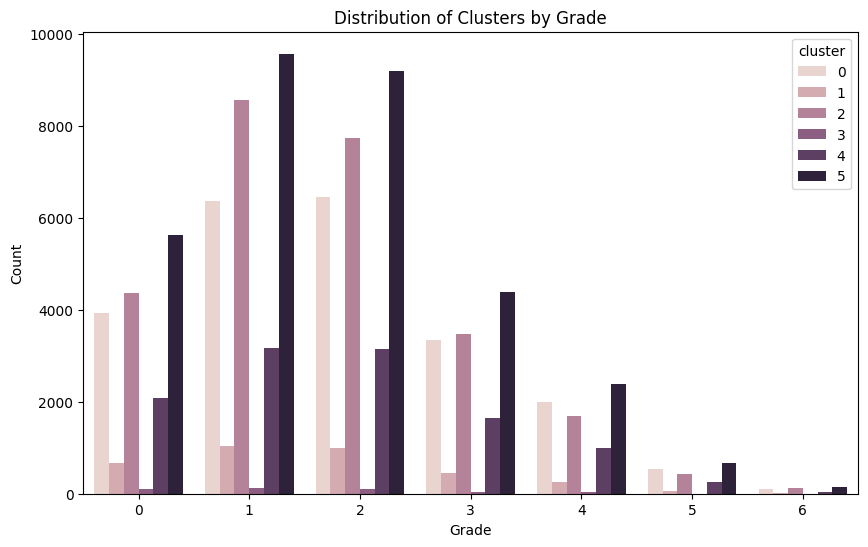

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'grade' and 'cluster' columns
# You might need to replace 'df' with the actual DataFrame name in your code

# Create a count plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='대출등급', hue='cluster', data=df)
plt.title('Distribution of Clusters by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()